### Get a CORGIS dataset, and use pandas to import this data into a dataframe

Cancer dataset:

In [173]:
import pandas as pd
df = pd.read_csv('cancer.csv')

### Print descriptive statistics about the columns using the "describe" method

In [174]:
df.describe()

,Total.Rate,Total.Number,Total.Population,Rates.Age.< 18,Rates.Age.18-45,Rates.Age.45-64,Rates.Age.> 64,Rates.Age and Sex.< 18.Female,Rates.Age and Sex.< 18.Male,Rates.Age and Sex.18 - 45.Female,...,Types.Lung.Age and Sex.Male.45 - 64,Types.Lung.Age and Sex.Female.> 64,Types.Lung.Age and Sex.Male.> 64,Types.Lung.Race.White,Types.Lung.Race.White non-Hispanic,Types.Lung.Race.Black,Types.Lung.Race.Black non-Hispanic,Types.Lung.Race.Asian,Types.Lung.Race.Indigenous,Types.Lung.Race.Hispanic
count,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,190.656863,78723.725490,4.240151e+07,2.119608,14.764706,197.576471,980.949020,1.727451,2.033333,16.013725,...,64.825490,224.668627,354.956863,48.158824,49.341176,44.056863,44.500000,19.323529,27.309804,16.184314
std,28.592155,80861.292676,4.784244e+07,0.502004,2.204343,31.261040,75.189556,0.846186,0.931808,2.530219,...,21.288737,33.313394,69.938477,9.446125,9.274183,20.517283,21.431435,10.427801,26.435236,8.041079
min,98.500000,6361.000000,3.931624e+06,0.000000,10.000000,132.300000,735.800000,0.000000,0.000000,10.300000,...,26.000000,92.700000,153.200000,20.400000,20.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,176.500000,20631.000000,1.186991e+07,2.050000,13.350000,175.000000,943.550000,1.750000,2.050000,14.150000,...,48.950000,209.550000,313.300000,42.750000,43.700000,38.150000,39.950000,18.350000,4.450000,13.700000
50%,196.100000,54930.000000,3.034806e+07,2.200000,14.600000,189.300000,999.600000,2.000000,2.300000,16.000000,...,59.700000,225.800000,342.600000,48.100000,48.800000,47.000000,48.600000,22.200000,20.900000,18.100000
75%,210.750000,93328.000000,4.650326e+07,2.400000,16.250000,217.850000,1031.450000,2.200000,2.500000,17.700000,...,77.600000,248.150000,391.000000,54.500000,54.950000,60.000000,60.350000,25.500000,44.250000,20.450000
max,254.600000,393980.000000,2.611357e+08,2.700000,20.300000,263.900000,1110.200000,2.900000,3.200000,22.800000,...,112.600000,298.300000,519.100000,71.500000,71.900000,73.200000,73.600000,33.900000,87.500000,35.200000


### Choose a numerical column (which I'll call COL1) and calculate the mean, median, mode, and trimmed mean

- Don't use the "describe" method, but can use other convenient pandas methods to do this
- For the trimmed mean, choose what to trim, but comment on the amount choosing to trim


In [175]:
from scipy import stats

mean = df['Total.Rate'].mean()
median = df['Total.Rate'].median()
mode = df['Total.Rate'].mode()
# Various decimal values may potentially make the naive "mode" calculation less meaningful. 
# Rounding the values to whole number seems to produce a more meaningful/representative result.
rounded_mode = df['Total.Rate'].round().mode()
trimmed_mean = stats.trim_mean(df['Total.Rate'], 0.05) 

print("mean: " + str(mean))
print("median: " + str(median))
print("mode: \n" + str(mode))
print("rounded mode: \n" + str(rounded_mode) + "\n")
print("trimmed mean: " + str(trimmed_mean))

mean: 190.656862745098
median: 196.1
mode: 
0    167.9
1    211.2
Name: Total.Rate, dtype: float64
rounded mode: 
0    189.0
Name: Total.Rate, dtype: float64

trimmed mean: 191.5574468085106


### Plot a histogram of COL1 data and comment on the relative locations of the mean, median, mode, and trimmed mean

<AxesSubplot:ylabel='Frequency'>

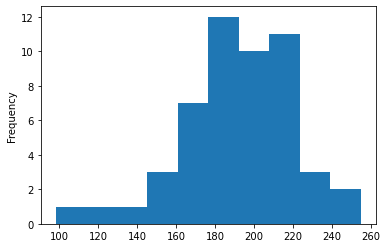

In [176]:
df['Total.Rate'].plot(kind='hist')

The mean of the data is lower than the median, indicating that it has a left skew, which is indeed shown in the histogram plot. The trimmed mean is not substantially different from the non-trimmed mean for this dataset. The histogram shows two different peaks, which I think may potentially indicate bimodality or could be just noise/measurement error. The non-rounded mode gives two different values, though the lower mode does not correspond well to the peak shown in the plot. The rounded mode gives a value that seems to correspond well to the highest peak.

### Calculate the mean absolute deviation, the standard deviation, and the interquartile range (the difference of the 75% and 25% quantile)

In [177]:
mad = df['Total.Rate'].mad()
stdev = df['Total.Rate'].std()
quantile_25 = df['Total.Rate'].quantile(0.25)
quantile_75 = df['Total.Rate'].quantile(0.75)
iqr = quantile_75 - quantile_25

print("mean absolute deviation: " + str(mad))
print("standard deviation: " + str(stdev))
print("25% quantile: " + str(quantile_25))
print("75% quantile: " + str(quantile_75))
print("interquartile range: " + str(iqr))

mean absolute deviation: 21.6557477893118
standard deviation: 28.59215455261783
25% quantile: 176.5
75% quantile: 210.75
interquartile range: 34.25


- Comment on how they compare to each other and to the histogram plot.

The MAD is smaller than the StDev, as expected (because the StDev calculation involving squaring will weight values with larger deviations more). The interquartile range (176.5 - 210.75) corresponds well to the central "peak" part of the histogram.

### Plot a box plot of COL1

<AxesSubplot:>

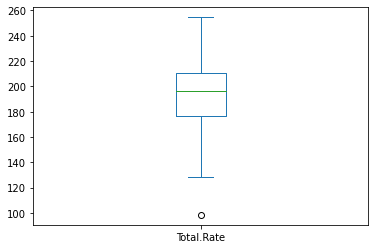

In [178]:
df['Total.Rate'].plot(kind='box')

- Comment on how the locations of the calculated median and the 25% and 75% quantiles match with features in the plot

The calculated median (196.1) and 25% and 75% quantiles (176.5 - 210.75) match exactly what is shown in the box plot.

### Make a new column in your dataframe called "COL1_mean_split"

- The values in the "COL1_mean_split" column should be equal to either 0, 1, or 2.  For any given row:
  - If the COL1 value < 0.5 * (COL1 mean), set the COL1_mean_split value to 0
  - If the COL1 value >= 0.5 * (COL1 mean) and COL1 value < (COL1 mean), set the COL1_mean_split value to 1
  - If the COL1 value >= (COL1 mean), set the COL1_mean_split value to 2

In [179]:
def mean_split(value):
    if value < 0.5 * mean : return 0
    elif value >= 0.5 * mean and value < mean : return 1
    else : return 2

df['Total.Rate_mean_split'] = df['Total.Rate'].apply(mean_split)

### Make a bar plot showing the count of the values of 0, 1, and 2 in the COL1_mean_split column

<AxesSubplot:>

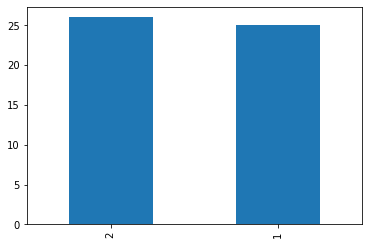

In [180]:
df['Total.Rate_mean_split'].value_counts().plot(kind="bar")

### Make another box plot of the COL1 values grouped by COL1_mean_split values

- There should be three boxes in the plot, one for each group of rows corresponding to COL1_mean_split values of 0, 1, or 2

<AxesSubplot:title={'center':'Total.Rate'}, xlabel='Total.Rate_mean_split'>

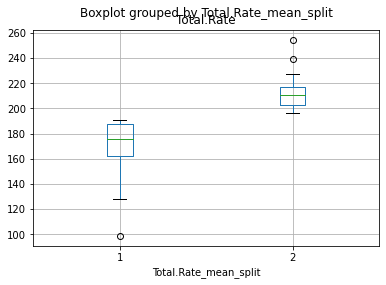

In [181]:
df.boxplot(column=['Total.Rate'], by='Total.Rate_mean_split')

### Choose another numerical column (COL3)

- Calculate the correlation between COL1 and COL3
- Make a scatter plot of COL1 vs COL3 and comment on whether the calculated correlation value makes sense.

correlation between Total.Rate and Total.Population: -0.15759350769729671


<AxesSubplot:xlabel='Total.Population', ylabel='Total.Rate'>

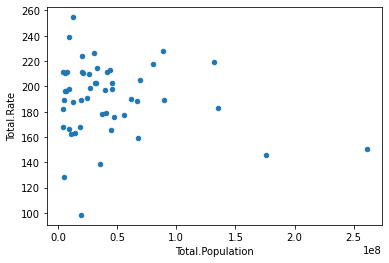

In [182]:
correlation = df['Total.Rate'].corr(df['Total.Population'])
print('correlation between Total.Rate and Total.Population: ' + str(correlation))

df[['Total.Rate', 'Total.Population']].plot(kind='scatter', x='Total.Population', y='Total.Rate')

The scatter plot doesn't seem to present a very strong pattern, but the highest values for population do seem to correspond to lower values for cancer rates. So a slightly negative correlation value seems to make sense.

- Make a hexagonal binning plot of COL1 vs COL3

<AxesSubplot:xlabel='Total.Population', ylabel='Total.Rate'>

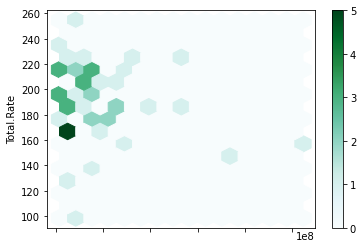

In [183]:
df.plot.hexbin(x='Total.Population', y='Total.Rate', gridsize=15)